# Project: Investigation of Dataset with Visualization

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

<a id='wrangling'></a>
## Data Wrangling

### Data Gathering

In [2]:
# Read data
flight_df1 = pd.read_csv('Flight_Report_For_January_2020.csv')
flight_df2 = pd.read_csv('Flight_Report_For_February_2020.csv')
flight_df3 = pd.read_csv('Flight_Report_For_March_2020.csv')

In [3]:
# Combine the dataframe to from on table 
combined_df = pd.concat([flight_df1, flight_df2, flight_df3])

#### Testing
<p> Test the gathered data to ensure no error corrected during files reading and combing </p>

In [4]:
# Check if columns are thesame
assert combined_df.shape[1] == flight_df1.shape[1] == flight_df2.shape[1] == flight_df3.shape[1]

# Check if the rows sum of the seperate dataframe equal the rows in the combined dataframe
assert combined_df.shape[0] == flight_df1.shape[0] + flight_df2.shape[0] + flight_df3.shape[0]

# Preview dataframe
combined_df.head()

,YEAR,MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,...,DEST_CITY_MARKET_ID,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,CANCELLED,CANCELLATION_CODE,DIVERTED,FLIGHTS,Unnamed: 24
0,2020,1,3,WN,19393,5888,13891,1389101,32575,ONT,...,32457,"San Francisco, CA",CA,6,California,0.0,NaN,0.0,1.0,NaN
1,2020,1,3,WN,19393,6276,13891,1389101,32575,ONT,...,32457,"San Francisco, CA",CA,6,California,0.0,NaN,0.0,1.0,NaN
2,2020,1,3,WN,19393,4598,13891,1389101,32575,ONT,...,32457,"San Jose, CA",CA,6,California,0.0,NaN,0.0,1.0,NaN
3,2020,1,3,WN,19393,4761,13891,1389101,32575,ONT,...,32457,"San Jose, CA",CA,6,California,0.0,NaN,0.0,1.0,NaN
4,2020,1,3,WN,19393,5162,13891,1389101,32575,ONT,...,32457,"San Jose, CA",CA,6,California,0.0,NaN,0.0,1.0,NaN


### Data Assessing 

In [5]:
# assessing data shape
combined_df.shape

(1829843, 25)

In [6]:
# assessing data info (columns data types)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1829843 entries, 0 to 648228
Data columns (total 25 columns):
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK              int64
OP_UNIQUE_CARRIER        object
OP_CARRIER_AIRLINE_ID    int64
OP_CARRIER_FL_NUM        int64
ORIGIN_AIRPORT_ID        int64
ORIGIN_AIRPORT_SEQ_ID    int64
ORIGIN_CITY_MARKET_ID    int64
ORIGIN                   object
ORIGIN_CITY_NAME         object
ORIGIN_STATE_ABR         object
ORIGIN_STATE_NM          object
DEST_AIRPORT_ID          int64
DEST_AIRPORT_SEQ_ID      int64
DEST_CITY_MARKET_ID      int64
DEST_CITY_NAME           object
DEST_STATE_ABR           object
DEST_STATE_FIPS          int64
DEST_STATE_NM            object
CANCELLED                float64
CANCELLATION_CODE        object
DIVERTED                 float64
FLIGHTS                  float64
Unnamed: 24              float64
dtypes: float64(4), int64(12), object(9)
memory usage: 363.0+ MB


In [7]:
# count columns none null entries
combined_df.count()

YEAR                     1829843
MONTH                    1829843
DAY_OF_WEEK              1829843
OP_UNIQUE_CARRIER        1829843
OP_CARRIER_AIRLINE_ID    1829843
OP_CARRIER_FL_NUM        1829843
ORIGIN_AIRPORT_ID        1829843
ORIGIN_AIRPORT_SEQ_ID    1829843
ORIGIN_CITY_MARKET_ID    1829843
ORIGIN                   1829843
ORIGIN_CITY_NAME         1829843
ORIGIN_STATE_ABR         1829843
ORIGIN_STATE_NM          1829843
DEST_AIRPORT_ID          1829843
DEST_AIRPORT_SEQ_ID      1829843
DEST_CITY_MARKET_ID      1829843
DEST_CITY_NAME           1829843
DEST_STATE_ABR           1829843
DEST_STATE_FIPS          1829843
DEST_STATE_NM            1829843
CANCELLED                1829843
CANCELLATION_CODE         122250
DIVERTED                 1829843
FLIGHTS                  1829843
Unnamed: 24                    0
dtype: int64

In [8]:
# assessing data uniqueness
combined_df.nunique()

YEAR                        1
MONTH                       3
DAY_OF_WEEK                 7
OP_UNIQUE_CARRIER          17
OP_CARRIER_AIRLINE_ID      17
OP_CARRIER_FL_NUM        6735
ORIGIN_AIRPORT_ID         353
ORIGIN_AIRPORT_SEQ_ID     353
ORIGIN_CITY_MARKET_ID     328
ORIGIN                    353
ORIGIN_CITY_NAME          346
ORIGIN_STATE_ABR           52
ORIGIN_STATE_NM            52
DEST_AIRPORT_ID           352
DEST_AIRPORT_SEQ_ID       352
DEST_CITY_MARKET_ID       327
DEST_CITY_NAME            345
DEST_STATE_ABR             52
DEST_STATE_FIPS            52
DEST_STATE_NM              52
CANCELLED                   2
CANCELLATION_CODE           4
DIVERTED                    2
FLIGHTS                     1
Unnamed: 24                 0
dtype: int64

In [9]:
combined_df.CANCELLED.sum()

122250.0

In [10]:
# Check for duplicate
combined_df.duplicated().sum()

1150823

In [11]:
combined_df[combined_df.OP_CARRIER_AIRLINE_ID.duplicated()].head()

,YEAR,MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,...,DEST_CITY_MARKET_ID,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,CANCELLED,CANCELLATION_CODE,DIVERTED,FLIGHTS,Unnamed: 24
1,2020,1,3,WN,19393,6276,13891,1389101,32575,ONT,...,32457,"San Francisco, CA",CA,6,California,0.0,NaN,0.0,1.0,NaN
2,2020,1,3,WN,19393,4598,13891,1389101,32575,ONT,...,32457,"San Jose, CA",CA,6,California,0.0,NaN,0.0,1.0,NaN
3,2020,1,3,WN,19393,4761,13891,1389101,32575,ONT,...,32457,"San Jose, CA",CA,6,California,0.0,NaN,0.0,1.0,NaN
4,2020,1,3,WN,19393,5162,13891,1389101,32575,ONT,...,32457,"San Jose, CA",CA,6,California,0.0,NaN,0.0,1.0,NaN
5,2020,1,3,WN,19393,5684,13891,1389101,32575,ONT,...,32457,"San Jose, CA",CA,6,California,0.0,NaN,0.0,1.0,NaN


##### Quality
- Last Column has no name or data
- Columns names is upper cast 
- Months are represent by numbers rather than names
- Dates of the week are represented by number instead of names
- City name is written along with state abbreviation
- Duplicated rows


##### Tidyness
- State name appreared twice, as full and abbreviation
- City name also contains state abbrevation 
- Some columns have inaccurate data type
- Data requires two data frame (table)

###### Define
Removed `unnamed` colomn
<p> This column was formed during data gathering and it contains NAN only </p>

###### Code

In [12]:
combined_df.drop(combined_df.columns[combined_df.columns.str.contains('unnamed',case = False)], axis = 1, inplace = True)

###### Test

In [13]:
combined_df.head()

,YEAR,MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,...,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,CANCELLED,CANCELLATION_CODE,DIVERTED,FLIGHTS
0,2020,1,3,WN,19393,5888,13891,1389101,32575,ONT,...,1477104,32457,"San Francisco, CA",CA,6,California,0.0,NaN,0.0,1.0
1,2020,1,3,WN,19393,6276,13891,1389101,32575,ONT,...,1477104,32457,"San Francisco, CA",CA,6,California,0.0,NaN,0.0,1.0
2,2020,1,3,WN,19393,4598,13891,1389101,32575,ONT,...,1483106,32457,"San Jose, CA",CA,6,California,0.0,NaN,0.0,1.0
3,2020,1,3,WN,19393,4761,13891,1389101,32575,ONT,...,1483106,32457,"San Jose, CA",CA,6,California,0.0,NaN,0.0,1.0
4,2020,1,3,WN,19393,5162,13891,1389101,32575,ONT,...,1483106,32457,"San Jose, CA",CA,6,California,0.0,NaN,0.0,1.0


###### Define
Make columns name lowercase

###### Code

In [14]:
combined_df.rename(columns = lambda x: x.lower(), inplace = True)

###### Test

In [15]:
combined_df.head()

,year,month,day_of_week,op_unique_carrier,op_carrier_airline_id,op_carrier_fl_num,origin_airport_id,origin_airport_seq_id,origin_city_market_id,origin,...,dest_airport_seq_id,dest_city_market_id,dest_city_name,dest_state_abr,dest_state_fips,dest_state_nm,cancelled,cancellation_code,diverted,flights
0,2020,1,3,WN,19393,5888,13891,1389101,32575,ONT,...,1477104,32457,"San Francisco, CA",CA,6,California,0.0,NaN,0.0,1.0
1,2020,1,3,WN,19393,6276,13891,1389101,32575,ONT,...,1477104,32457,"San Francisco, CA",CA,6,California,0.0,NaN,0.0,1.0
2,2020,1,3,WN,19393,4598,13891,1389101,32575,ONT,...,1483106,32457,"San Jose, CA",CA,6,California,0.0,NaN,0.0,1.0
3,2020,1,3,WN,19393,4761,13891,1389101,32575,ONT,...,1483106,32457,"San Jose, CA",CA,6,California,0.0,NaN,0.0,1.0
4,2020,1,3,WN,19393,5162,13891,1389101,32575,ONT,...,1483106,32457,"San Jose, CA",CA,6,California,0.0,NaN,0.0,1.0


###### Define
Removed all duplicated row from data frame

###### Code

In [16]:
combined_df.drop_duplicates(inplace = True)

###### Test

In [17]:
combined_df.duplicated().sum()

0

###### Define
Make a data frame for the states an their abbreviations 

###### Code

In [18]:
state = []
state_name = combined_df.origin_state_nm.unique()
state_abr = combined_df.origin_state_abr.unique()
for num in range(52):
    a = state_name[num]
    b = state_abr[num]
    state.append({'name':a, 'abr':b})
state_df = pd.DataFrame(data = state)
state_df.to_csv('states_name_and_abbrevation.csv', index = False)

###### Test

In [19]:
state_df.head()

,name,abr
0,California,CA
1,Virginia,VA
2,Florida,FL
3,Oregon,OR
4,Pennsylvania,PA


###### Define
Remove states full names 

###### Code

In [20]:
combined_df.drop(['origin_state_nm', 'dest_state_nm'], axis =1, inplace = True)

###### Test

In [21]:
combined_df.head()

,year,month,day_of_week,op_unique_carrier,op_carrier_airline_id,op_carrier_fl_num,origin_airport_id,origin_airport_seq_id,origin_city_market_id,origin,...,dest_airport_id,dest_airport_seq_id,dest_city_market_id,dest_city_name,dest_state_abr,dest_state_fips,cancelled,cancellation_code,diverted,flights
0,2020,1,3,WN,19393,5888,13891,1389101,32575,ONT,...,14771,1477104,32457,"San Francisco, CA",CA,6,0.0,NaN,0.0,1.0
1,2020,1,3,WN,19393,6276,13891,1389101,32575,ONT,...,14771,1477104,32457,"San Francisco, CA",CA,6,0.0,NaN,0.0,1.0
2,2020,1,3,WN,19393,4598,13891,1389101,32575,ONT,...,14831,1483106,32457,"San Jose, CA",CA,6,0.0,NaN,0.0,1.0
3,2020,1,3,WN,19393,4761,13891,1389101,32575,ONT,...,14831,1483106,32457,"San Jose, CA",CA,6,0.0,NaN,0.0,1.0
4,2020,1,3,WN,19393,5162,13891,1389101,32575,ONT,...,14831,1483106,32457,"San Jose, CA",CA,6,0.0,NaN,0.0,1.0


###### Define
Make columns name lowercase

###### Code

In [22]:
combined_df['origin_city_name'] = combined_df['origin_city_name'].str[:-4]
combined_df['dest_city_name'] = combined_df['dest_city_name'].str[:-4]

###### Test

In [23]:
combined_df.head()

,year,month,day_of_week,op_unique_carrier,op_carrier_airline_id,op_carrier_fl_num,origin_airport_id,origin_airport_seq_id,origin_city_market_id,origin,...,dest_airport_id,dest_airport_seq_id,dest_city_market_id,dest_city_name,dest_state_abr,dest_state_fips,cancelled,cancellation_code,diverted,flights
0,2020,1,3,WN,19393,5888,13891,1389101,32575,ONT,...,14771,1477104,32457,San Francisco,CA,6,0.0,NaN,0.0,1.0
1,2020,1,3,WN,19393,6276,13891,1389101,32575,ONT,...,14771,1477104,32457,San Francisco,CA,6,0.0,NaN,0.0,1.0
2,2020,1,3,WN,19393,4598,13891,1389101,32575,ONT,...,14831,1483106,32457,San Jose,CA,6,0.0,NaN,0.0,1.0
3,2020,1,3,WN,19393,4761,13891,1389101,32575,ONT,...,14831,1483106,32457,San Jose,CA,6,0.0,NaN,0.0,1.0
4,2020,1,3,WN,19393,5162,13891,1389101,32575,ONT,...,14831,1483106,32457,San Jose,CA,6,0.0,NaN,0.0,1.0


###### Define
Remove unnecessary columns
<p>Here several column will be removed because a they are either not required for the evaluation or represents similar property like a different column.  These columns to be dropped include:<p/>

- `year` : Since all data is from 2020, this column is not essential
- `op_carrier_airline`: Represented by op_unique_carrier
- `origin_airport_seq_id` and `origin`: Represented by `origin_airport_seq_id`
- `dest_state_fips`: It also represents the states


###### Code

In [24]:
lists = ['year', 'op_carrier_airline_id', 'origin_airport_seq_id', 'origin', 'origin_city_market_id', 'dest_airport_seq_id', 'dest_city_market_id', 'dest_state_fips']
combined_df.drop(lists, axis = 1, inplace  = True)

###### Test

In [25]:
combined_df.head()

,month,day_of_week,op_unique_carrier,op_carrier_fl_num,origin_airport_id,origin_city_name,origin_state_abr,dest_airport_id,dest_city_name,dest_state_abr,cancelled,cancellation_code,diverted,flights
0,1,3,WN,5888,13891,Ontario,CA,14771,San Francisco,CA,0.0,NaN,0.0,1.0
1,1,3,WN,6276,13891,Ontario,CA,14771,San Francisco,CA,0.0,NaN,0.0,1.0
2,1,3,WN,4598,13891,Ontario,CA,14831,San Jose,CA,0.0,NaN,0.0,1.0
3,1,3,WN,4761,13891,Ontario,CA,14831,San Jose,CA,0.0,NaN,0.0,1.0
4,1,3,WN,5162,13891,Ontario,CA,14831,San Jose,CA,0.0,NaN,0.0,1.0


###### Define
Change data types of some columns to the required form for carry-out our visualization

###### Code

In [26]:
combined_df[['month', 'day_of_week', 'op_carrier_fl_num', 'origin_airport_id', 'dest_airport_id']] = combined_df[['month', 'day_of_week', 'op_carrier_fl_num', 'origin_airport_id', 'dest_airport_id']].astype(str)

###### Test

In [27]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679020 entries, 0 to 648228
Data columns (total 14 columns):
month                679020 non-null object
day_of_week          679020 non-null object
op_unique_carrier    679020 non-null object
op_carrier_fl_num    679020 non-null object
origin_airport_id    679020 non-null object
origin_city_name     679020 non-null object
origin_state_abr     679020 non-null object
dest_airport_id      679020 non-null object
dest_city_name       679020 non-null object
dest_state_abr       679020 non-null object
cancelled            679020 non-null float64
cancellation_code    104361 non-null object
diverted             679020 non-null float64
flights              679020 non-null float64
dtypes: float64(3), object(11)
memory usage: 77.7+ MB


###### Define
Change the months and days represented by numbers to their names 

###### Code

In [28]:
combined_df['month'].replace({'1': 'January', '2': 'February', '3': 'March'}, inplace = True)
combined_df['day_of_week'].replace({'1':'Sunday', '2':'Monday', '3':'Tuesday', '4':'Wednesday', '5':'Thursday', '6':'Friday', '7':'Saturday'}, inplace = True)

###### Test

In [29]:
combined_df.head()

,month,day_of_week,op_unique_carrier,op_carrier_fl_num,origin_airport_id,origin_city_name,origin_state_abr,dest_airport_id,dest_city_name,dest_state_abr,cancelled,cancellation_code,diverted,flights
0,January,Tuesday,WN,5888,13891,Ontario,CA,14771,San Francisco,CA,0.0,NaN,0.0,1.0
1,January,Tuesday,WN,6276,13891,Ontario,CA,14771,San Francisco,CA,0.0,NaN,0.0,1.0
2,January,Tuesday,WN,4598,13891,Ontario,CA,14831,San Jose,CA,0.0,NaN,0.0,1.0
3,January,Tuesday,WN,4761,13891,Ontario,CA,14831,San Jose,CA,0.0,NaN,0.0,1.0
4,January,Tuesday,WN,5162,13891,Ontario,CA,14831,San Jose,CA,0.0,NaN,0.0,1.0


##### Cleaned Data

In [30]:
combined_df.to_csv('cleaned_data.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis

In [31]:
df = pd.read_csv('cleaned_data.csv')

In [32]:
df.head()

,month,day_of_week,op_unique_carrier,op_carrier_fl_num,origin_airport_id,origin_city_name,origin_state_abr,dest_airport_id,dest_city_name,dest_state_abr,cancelled,cancellation_code,diverted,flights
0,January,Tuesday,WN,5888,13891,Ontario,CA,14771,San Francisco,CA,0.0,NaN,0.0,1.0
1,January,Tuesday,WN,6276,13891,Ontario,CA,14771,San Francisco,CA,0.0,NaN,0.0,1.0
2,January,Tuesday,WN,4598,13891,Ontario,CA,14831,San Jose,CA,0.0,NaN,0.0,1.0
3,January,Tuesday,WN,4761,13891,Ontario,CA,14831,San Jose,CA,0.0,NaN,0.0,1.0
4,January,Tuesday,WN,5162,13891,Ontario,CA,14831,San Jose,CA,0.0,NaN,0.0,1.0


### Univarent Visualization

#### What's the summary of the data

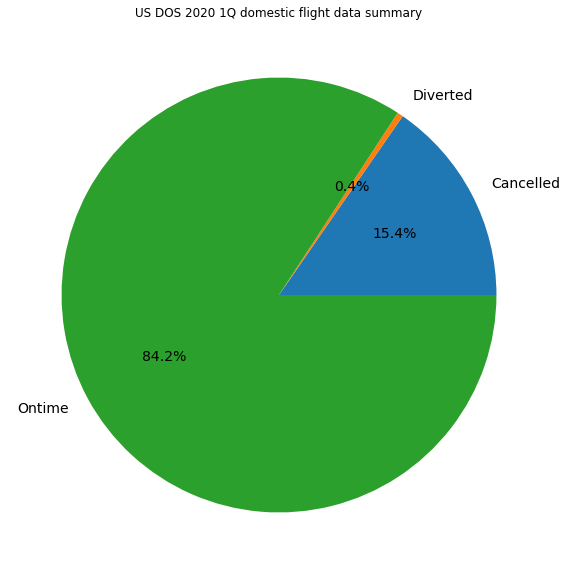

In [33]:
plt.figure(figsize=[20,10])
cancelled = df['cancelled'].sum()
diverted = df['diverted'].sum()
ontime = df['flights'].sum() - cancelled - diverted
summary = [cancelled, diverted, ontime]
plt.pie(summary, labels=['Cancelled', 'Diverted', 'Ontime'], autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title('US DOS 2020 1Q domestic flight data summary');

#### What's the distributionn of the result across the origin cities

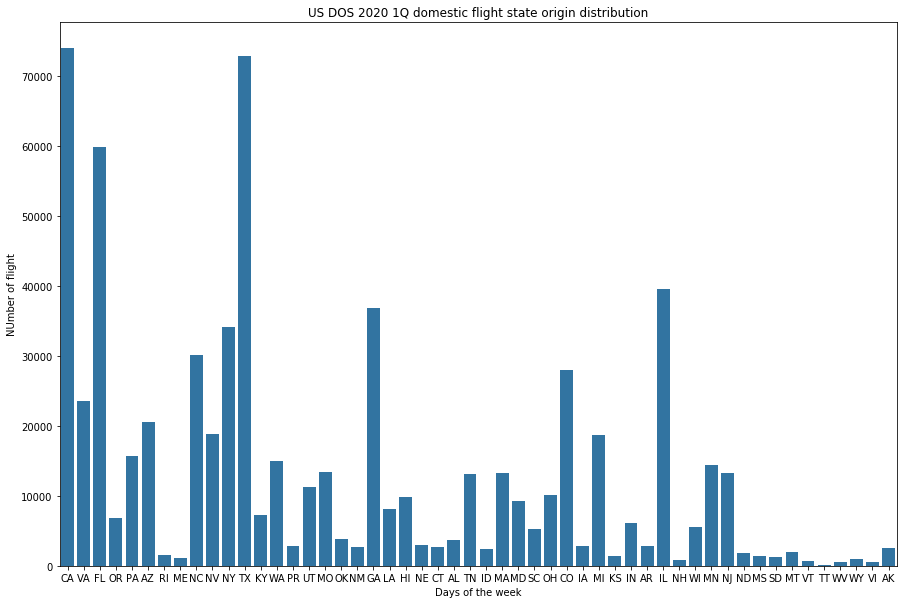

In [34]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [15,10])
sb.countplot(data = df, x ='origin_state_abr', color = base_color)
plt.xlabel('Days of the week')
plt.ylabel('NUmber of flight')
plt.title('US DOS 2020 1Q domestic flight state origin distribution');

#### Observation
The data contained flight informations from various state of which most were from canada(CA)

In [35]:
# To make to make the analysis easier to carryout, only flight record from canada (CA) will be recorded,
# since of of the flight records has CA airports as their origin
df_ca = df[df['origin_state_abr'] == 'CA'].reset_index(drop =True)

#### What's the summary of the data of which the flight origin is Canada (CA)

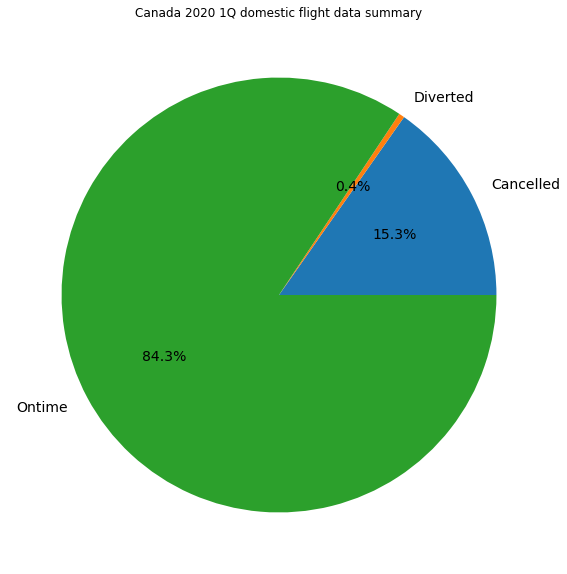

In [36]:
plt.figure(figsize=[20,10])
cancelled = df_ca['cancelled'].sum()
diverted = df_ca['diverted'].sum()
ontime = df_ca['flights'].sum() - cancelled - diverted
summary = [cancelled, diverted, ontime]
plt.pie(summary, labels=['Cancelled', 'Diverted', 'Ontime'], autopct='%1.1f%%', textprops={'fontsize': 14});
plt.title('Canada 2020 1Q domestic flight data summary');

#### Observation 
The summary of this sample is similar to that of the population 

#### How the flight distributed across time

Text(0.5, 1.0, 'Flight Distribution Over Days Of Week')

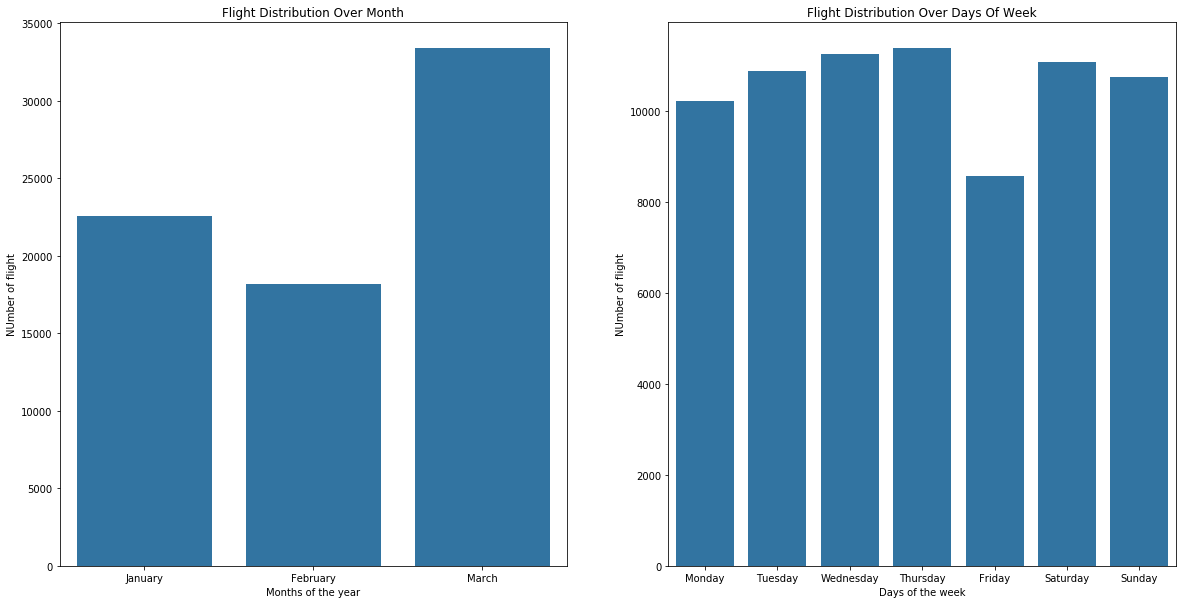

In [37]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [20,10])
# Subplot representing the flight distribution over the months of aquired data
plt.subplot(1,2,1)
sb.countplot(data = df_ca, x ='month', color = base_color)
plt.xlabel('Months of the year')
plt.ylabel('NUmber of flight')
plt.title('Flight Distribution Over Month')

# Subplot representing the flight distribution over the days of the week
plt.subplot(1,2,2)
days =  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.countplot(data = df_ca, x ='day_of_week', order = days, color = base_color)
plt.xlabel('Days of the week')
plt.ylabel('NUmber of flight')
plt.title('Flight Distribution Over Days Of Week')



#### Observation
In 2020 Q1, domestic flight who's origin was from canada had;
- Majority of the flight booking during march
- A significant increase in the flight booking during the weekday (monday - thursday) and decline during weekend
- Most flight took place on thursday


Text(0.5, 1.0, 'OP unique carrier distribution')

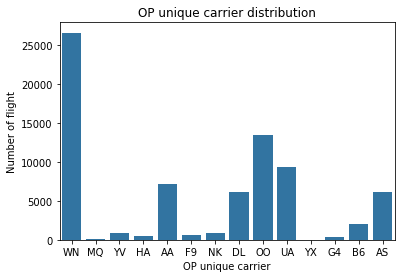

In [38]:
sb.countplot(data = df_ca, x ='op_unique_carrier', color = base_color)
plt.xlabel('OP unique carrier')
plt.ylabel('Number of flight')
plt.title('OP unique carrier distribution')

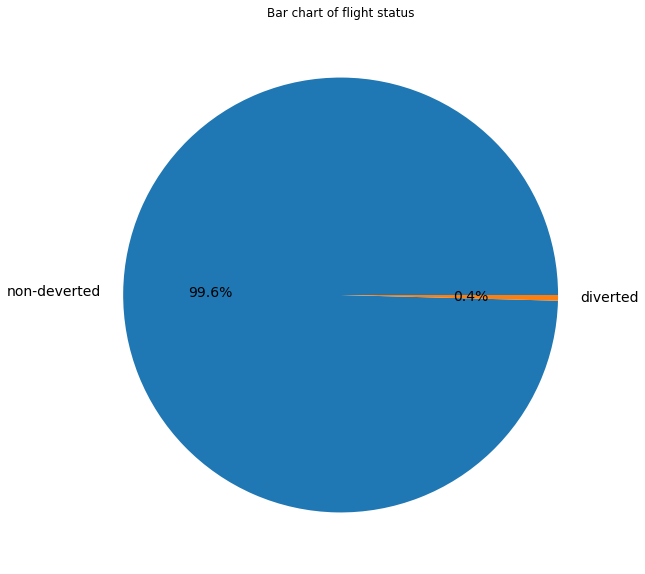

In [39]:
plt.figure(figsize=[20,10])
sorted_count = df_ca['diverted'].value_counts()
plt.pie(sorted_count, labels=['non-deverted','diverted'], autopct='%1.1f%%',
         textprops={'fontsize': 14})
plt.title('Flight status distributions')
plt.title('Bar chart of flight status');

#### Observation 
An insignificant amount of the flight was diverted in canada during 2020 Q1

#### What are the cause of cancelled flight

Text(0.5, 1.0, 'Cancelled flight breakdown')

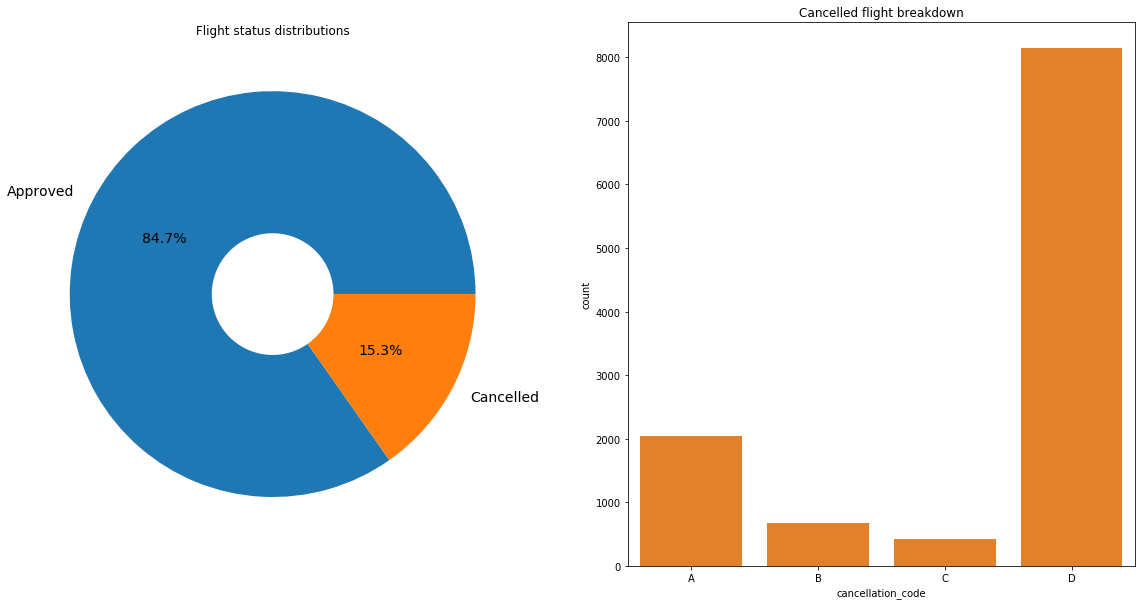

In [40]:
plt.figure(figsize=[20,10])


plt.subplot(1,2,1)
cancelled_status_count = df_ca['cancelled'].value_counts()
plt.pie(cancelled_status_count, labels=['Approved','Cancelled'], autopct='%1.1f%%',
        wedgeprops={'width':0.7}, textprops={'fontsize': 14})
plt.title('Flight status distributions')




plt.subplot(1,2,2)
sb.countplot(data = df_ca, x ='cancellation_code', order=['A','B', 'C','D'], color = sb.color_palette()[1])
plt.title('Cancelled flight breakdown')

#### Observation
- 15.3% of the flight where cancelled
- Most flight where cancalled because of security (cancallation code: D)
- The least reason for flight cancellation is NAS (cancallation code: C)

#### Where do people travel to from canada

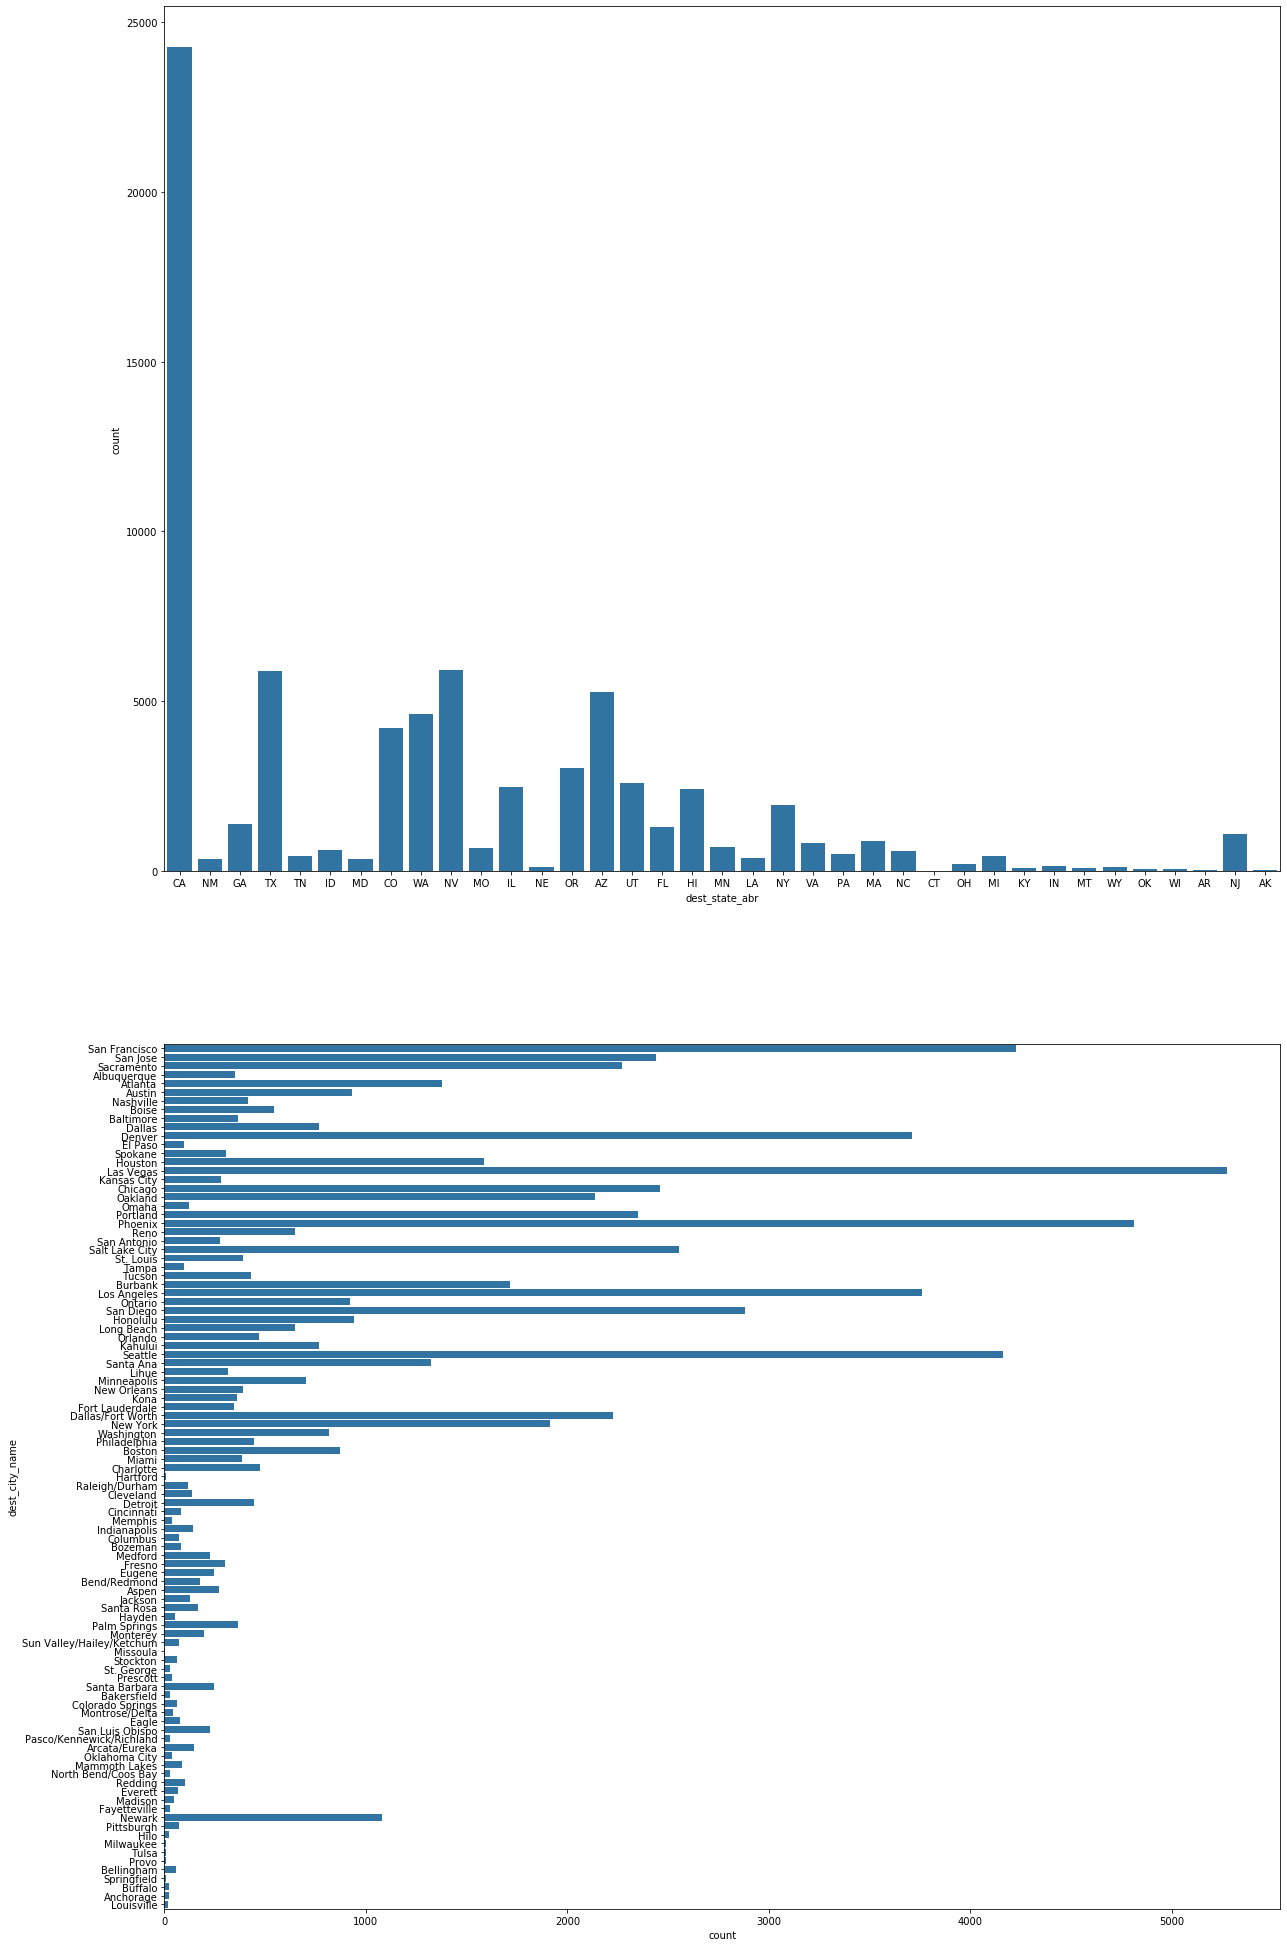

In [41]:
plt.figure(figsize = [20,35])

# Subplot 1
# Destination state from canada
plt.subplot(2,1,1)
sb.countplot(data = df_ca, x ='dest_state_abr', color = base_color)

# Subplot 2
# Destination city from canada
plt.subplot(2,1,2)
sb.countplot(data = df_ca, y ='dest_city_name', color = base_color)

#### Observation
For flight whose origin was in canada;
- Had majoirity of there destination in canada
- There was no unique city destination but majority it was Las Vegas

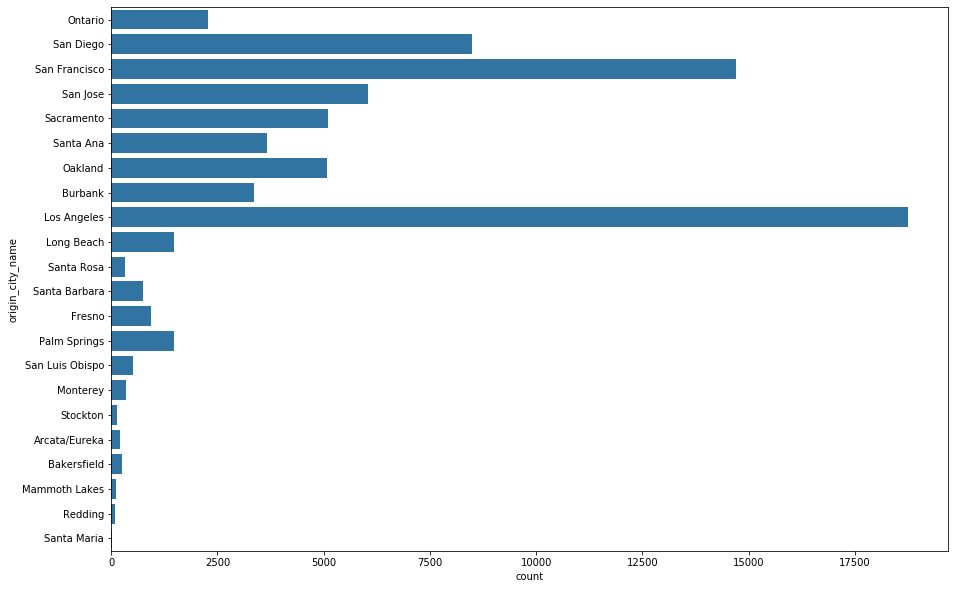

In [42]:
plt.figure(figsize = [15,10])
sb.countplot(data = df_ca, y ='origin_city_name', color = base_color)

## Bivarent Visualiztion

#### Whats the relationship between the days of the week and the months?

<Figure size 720x360 with 0 Axes>

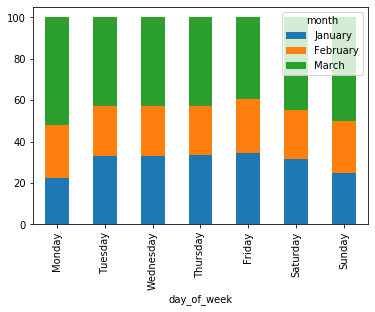

In [43]:
# stacked bar chart showing the flight months distributions across the days of the week
plt.figure(figsize=(10,5))
days=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
months=['January', 'February', 'March']
sorted_data = df_ca.groupby('day_of_week')['month'].value_counts()
sorted_data.unstack().reindex(days)[months].apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar', stacked=True)

#### Observation
- In january and February, most flight was on flight
- While in March, majority of the flight was on Monday

#### Effect of time on the cancelled flight 

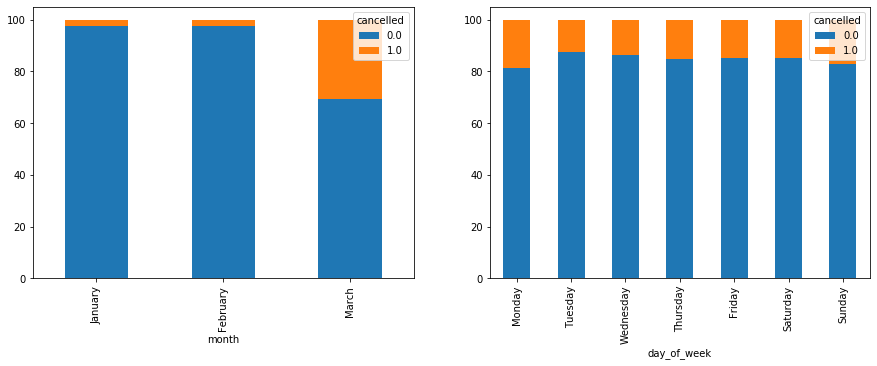

In [44]:
plt.figure(figsize=(15,5))

# Subplot 1
# Bar chart showing the relative distribution of approved to cancelled flight across the months
months=['January', 'February', 'March']
sorted_data = df_ca.groupby('month')['cancelled'].value_counts()
sorted_data.unstack().reindex(months).apply(lambda x: x*100/sum(x), axis=1).plot(
    kind='bar', ax=plt.subplot(1,2,1), stacked=True )

# Subplot 2
# Bar chart showing the relative distribution of approved to cancelled flight across the days of the week
order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorted_data = df_ca.groupby('day_of_week')['cancelled'].value_counts()
sorted_data.unstack().reindex(order).apply(lambda x: x*100/sum(x), axis=1).plot(
    kind='bar', ax=plt.subplot(1,2,2), stacked=True )

#### Observation
- most flight were cancelled during march
- and the cancelled flight proportion was similar irrespective of the day of the week 

#### What variables has a relationship with the cancelled flight

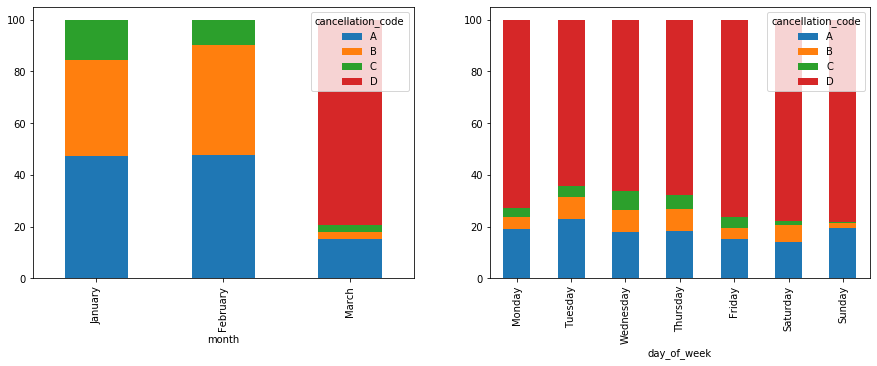

In [45]:
plt.figure(figsize=(15,5))

# Distribution go the cancellation code across the months
months=['January', 'February', 'March']
sorted_data = df_ca.groupby('month')['cancellation_code'].value_counts()
sorted_data.unstack().fillna(0).reindex(months).apply(lambda x: x*100/sum(x), axis=1).plot(
    kind='bar', ax=plt.subplot(1,2,1), stacked=True )

# Distribution go the cancellation code across the days of the week
order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorted_data = df_ca.groupby('day_of_week')['cancellation_code'].value_counts()
sorted_data.unstack().reindex(order).apply(lambda x: x*100/sum(x), axis=1).plot(
    kind='bar', ax=plt.subplot(1,2,2), stacked=True )




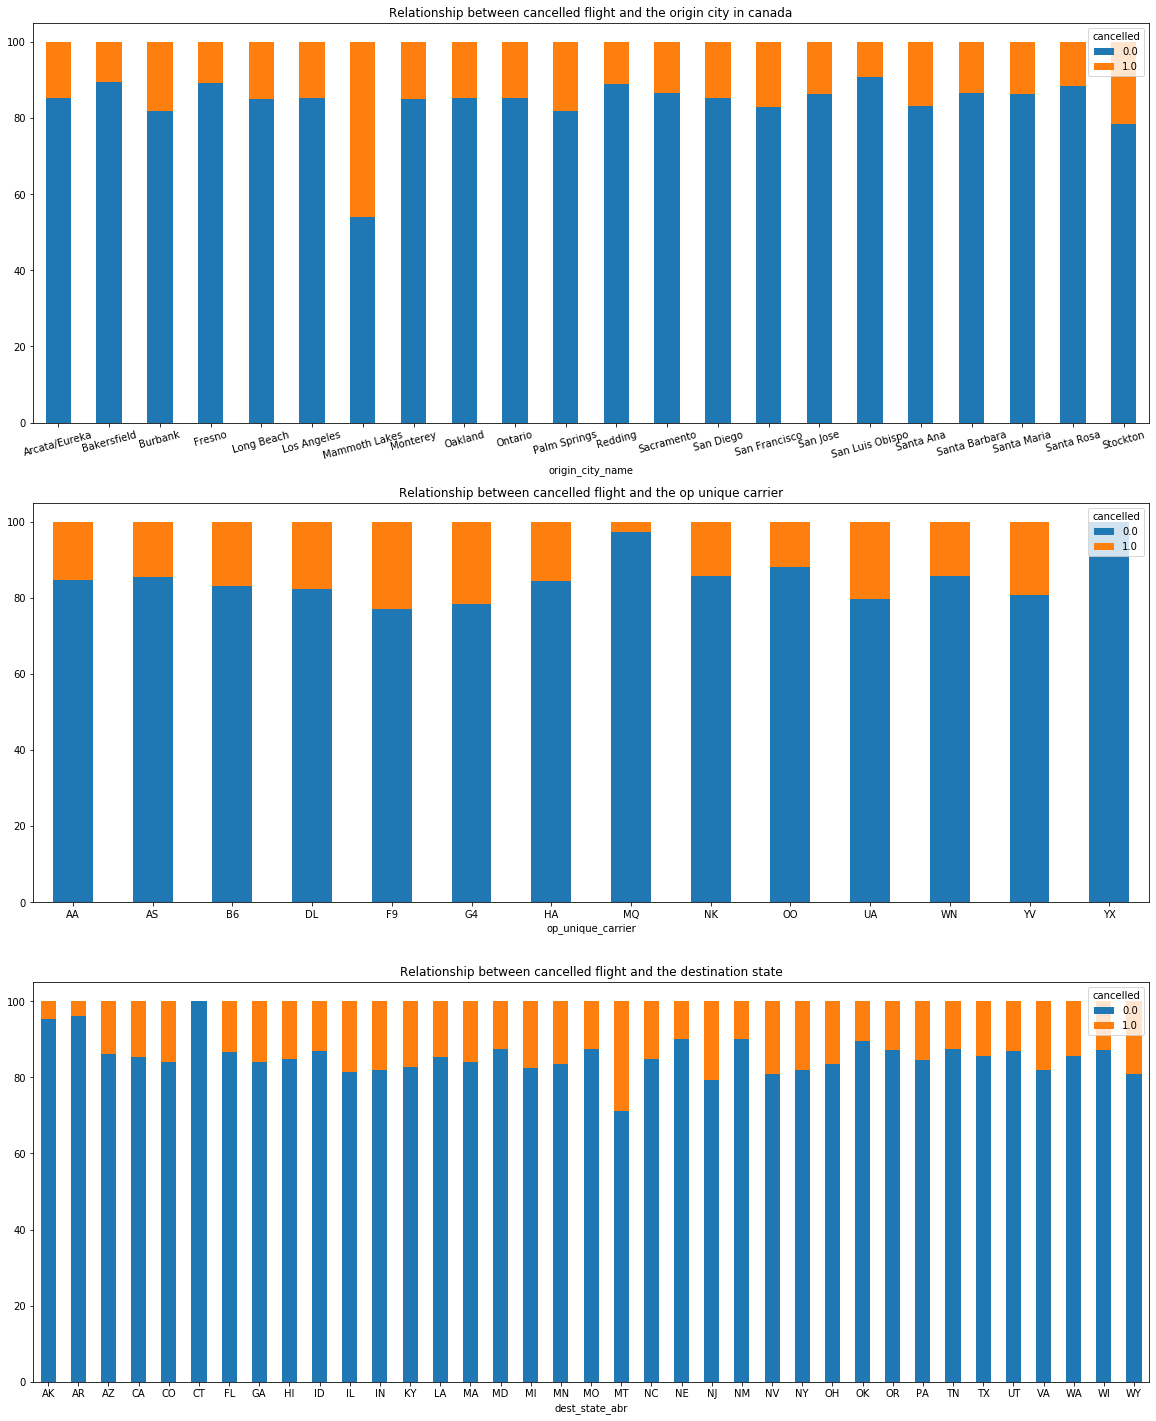

In [46]:
plt.figure(figsize=[20,25])

# Subplot 1
# Relationship between cancelled flight and the origin city in canada
sorted_data = df_ca.groupby('origin_city_name')['cancelled'].value_counts()
sorted_data.unstack().fillna(0).apply(lambda x: x*100/sum(x), axis=1).plot(
    kind='bar', ax=plt.subplot(3,1,1), title='Relationship between cancelled flight and the origin city in canada', stacked=True )
plt.xticks(rotation=15)

# Subplot 2
# Relationship between cancelled flight and the op unique carrier
sorted_data = df_ca.groupby('op_unique_carrier')['cancelled'].value_counts()
sorted_data.unstack().fillna(0).apply(lambda x: x*100/sum(x), axis=1).plot(
    kind='bar', ax=plt.subplot(3,1,2), title='Relationship between cancelled flight and the op unique carrier', stacked=True )
plt.xticks(rotation=0)

# Subplot 3
# Relationship between cancelled flight and the op unique carrier 
sorted_data = df_ca.groupby('dest_state_abr')['cancelled'].value_counts()
sorted_data.unstack().fillna(0).apply(lambda x: x*100/sum(x), axis=1).plot(
    kind='bar', ax=plt.subplot(3,1,3),title = 'Relationship between cancelled flight and the destination state', stacked=True )
plt.xticks(rotation=0);

#### Observation
- Mammoth lake has the highest proprotion of cancelled flight
- Op unique carrier `F9` had majority of the cancelled flight
- Finally, flight whose destination was Montana where cancalled more than the others

#### What variables has a relationship with the diverted flight

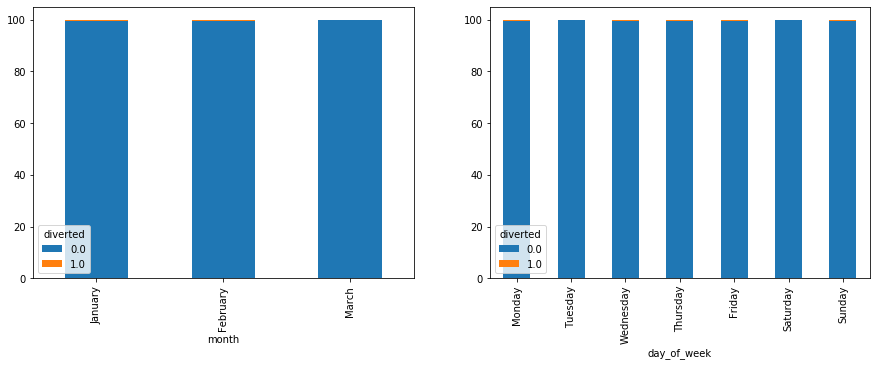

In [47]:
plt.figure(figsize=(15,5))

# Subplot 1
# Bar chart showing the relative distribution of approved to diverted flight across the months
months=['January', 'February', 'March']
sorted_data = df_ca.groupby('month')['diverted'].value_counts()
sorted_data.unstack().reindex(months).apply(lambda x: x*100/sum(x), axis=1).plot(
    kind='bar', ax=plt.subplot(1,2,1), stacked=True )

# Subplot 2
# Bar chart showing the relative distribution of approved to diverted flight across the days of the week
order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorted_data = df_ca.groupby('day_of_week')['diverted'].value_counts()
sorted_data.unstack().reindex(order).apply(lambda x: x*100/sum(x), axis=1).plot(
    kind='bar', ax=plt.subplot(1,2,2), stacked=True )

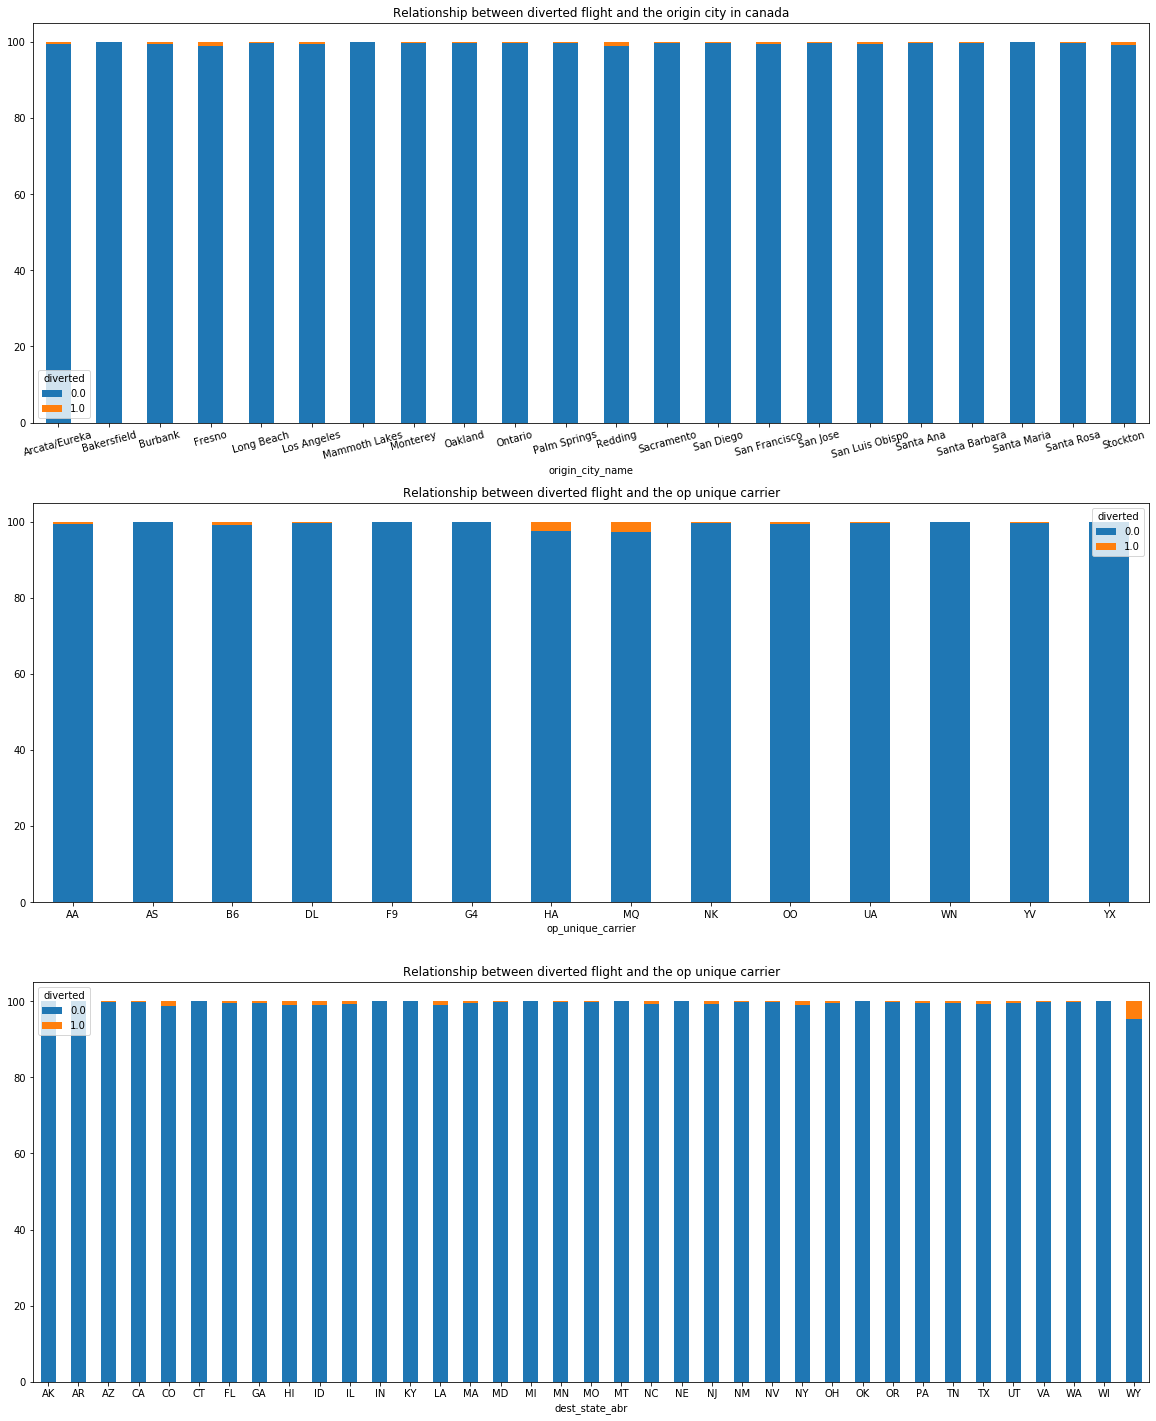

In [48]:
plt.figure(figsize=[20,25])

# Subplot 1
# Relationship between diverted flight and the origin city in canada
sorted_data = df_ca.groupby('origin_city_name')['diverted'].value_counts()
sorted_data.unstack().fillna(0).apply(lambda x: x*100/sum(x), axis=1).plot(
    kind='bar', ax=plt.subplot(3,1,1), title='Relationship between diverted flight and the origin city in canada', stacked=True )
plt.xticks(rotation=15)

# Subplot 2
# Relationship between diverted flight and the op unique carrier
sorted_data = df_ca.groupby('op_unique_carrier')['diverted'].value_counts()
sorted_data.unstack().fillna(0).apply(lambda x: x*100/sum(x), axis=1).plot(
    kind='bar', ax=plt.subplot(3,1,2), title='Relationship between diverted flight and the op unique carrier', stacked=True )
plt.xticks(rotation=0)

# Subplot 3
# Relationship between diverted flight and the op unique carrier 
sorted_data = df_ca.groupby('dest_state_abr')['diverted'].value_counts()
sorted_data.unstack().fillna(0).apply(lambda x: x*100/sum(x), axis=1).plot(
    kind='bar', ax=plt.subplot(3,1,3),title = 'Relationship between diverted flight and the op unique carrier', stacked=True )
plt.xticks(rotation=0);

#### Observation
The diverted flight had an insignificant on the airports performance, irrespective of the variable its compaired with